In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
file = '../../DO_allsites_allyears_20250611.csv'
df = pd.read_csv(file)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4628413 entries, 0 to 4628412
Data columns (total 6 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   site                   object 
 1   datetime_UTC           object 
 2   deployment_depth_m     int64  
 3   temperature_C          float64
 4   DO_percent_saturation  float64
 5   DO_mgl                 float64
dtypes: float64(3), int64(1), object(2)
memory usage: 211.9+ MB


In [36]:
df['datetime'] = pd.to_datetime(df['datetime_UTC'], utc=True)
df['datetime'] = df['datetime'].dt.tz_convert('America/Los_Angeles')

In [37]:
df.head()

,site,datetime_UTC,deployment_depth_m,temperature_C,DO_percent_saturation,DO_mgl,datetime
0,ALE,2011-07-25T19:45:00,3,15.21,114.53,11.50,2011-07-25 12:45:00-07:00
1,ALE,2011-07-25T20:00:00,3,15.28,114.79,11.51,2011-07-25 13:00:00-07:00
2,ALE,2011-07-25T20:15:00,3,15.22,116.72,11.71,2011-07-25 13:15:00-07:00
3,ALE,2011-07-25T20:30:00,3,15.36,116.35,11.64,2011-07-25 13:30:00-07:00
4,ALE,2011-07-25T20:45:00,3,15.43,117.11,11.70,2011-07-25 13:45:00-07:00


In [38]:
# Compute moving average (for example, 1-day window if data is 10-min sampled)
# Adjust 'window' to your sampling rate
window_size = 144   # e.g., 10-min samples → 144 points per day
df['moving_avg'] = df['DO_mgl'].rolling(window=window_size, center=True).mean()

In [39]:
start = '2017-07-1'
end = '2017-07-31'
mask = (df['site'] == 'SBH') & (df['datetime'] >= start) & (df['datetime'] <= end)
july_2017 = df.loc[mask]


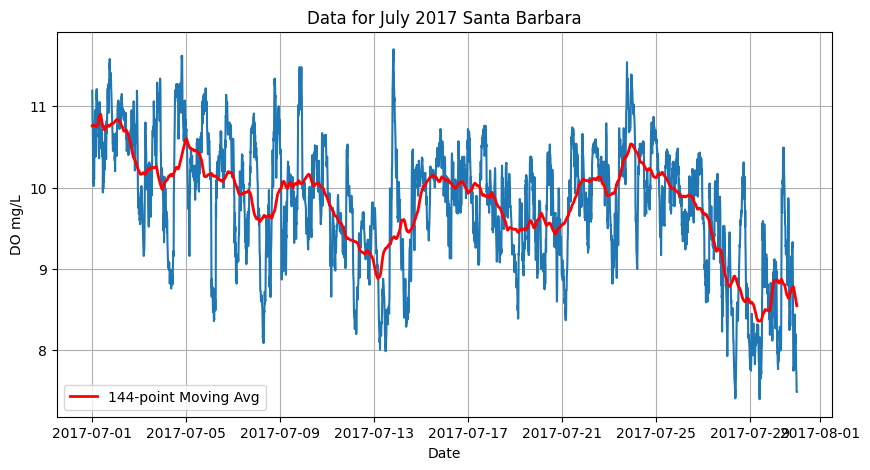

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(july_2017['datetime'], july_2017['DO_mgl'])
# Plot the moving average
plt.plot(july_2017['datetime'], july_2017['moving_avg'], color='red', linewidth=2, label=f'{window_size}-point Moving Avg')
plt.title('Data for July 2017 Santa Barbara')
plt.xlabel('Date')
plt.ylabel('DO mg/L')
plt.legend()
plt.grid(True)
plt.show()

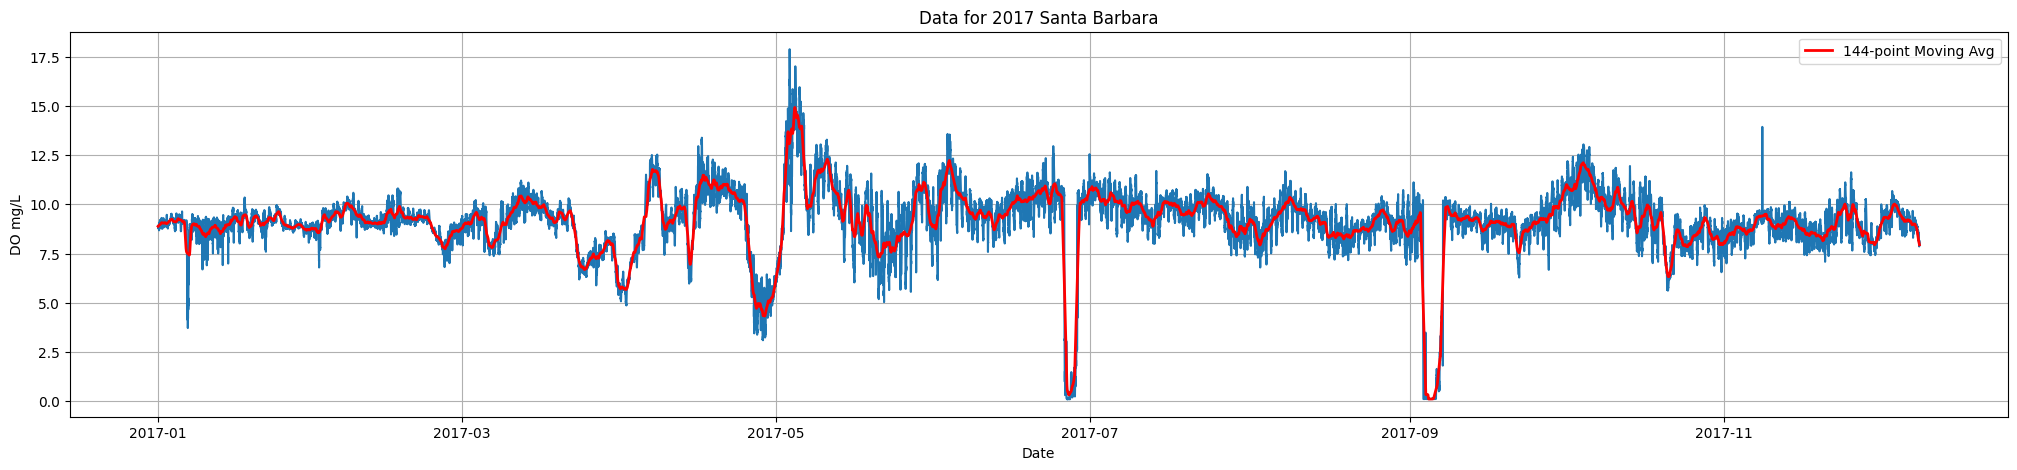

In [41]:
start = '2017-01-01'
end = '2017-12-31'
mask = (df['site'] == 'SBH') & (df['datetime'] >= start) & (df['datetime'] <= end)
july_2017 = df.loc[mask]
plt.figure(figsize=(25, 5))
plt.plot(july_2017['datetime'], july_2017['DO_mgl'])
# Plot the moving average
plt.plot(july_2017['datetime'], july_2017['moving_avg'], color='red', linewidth=2, label=f'{window_size}-point Moving Avg')
plt.title('Data for 2017 Santa Barbara')
plt.xlabel('Date')
plt.ylabel('DO mg/L')
plt.legend()
plt.grid(True)
plt.show()

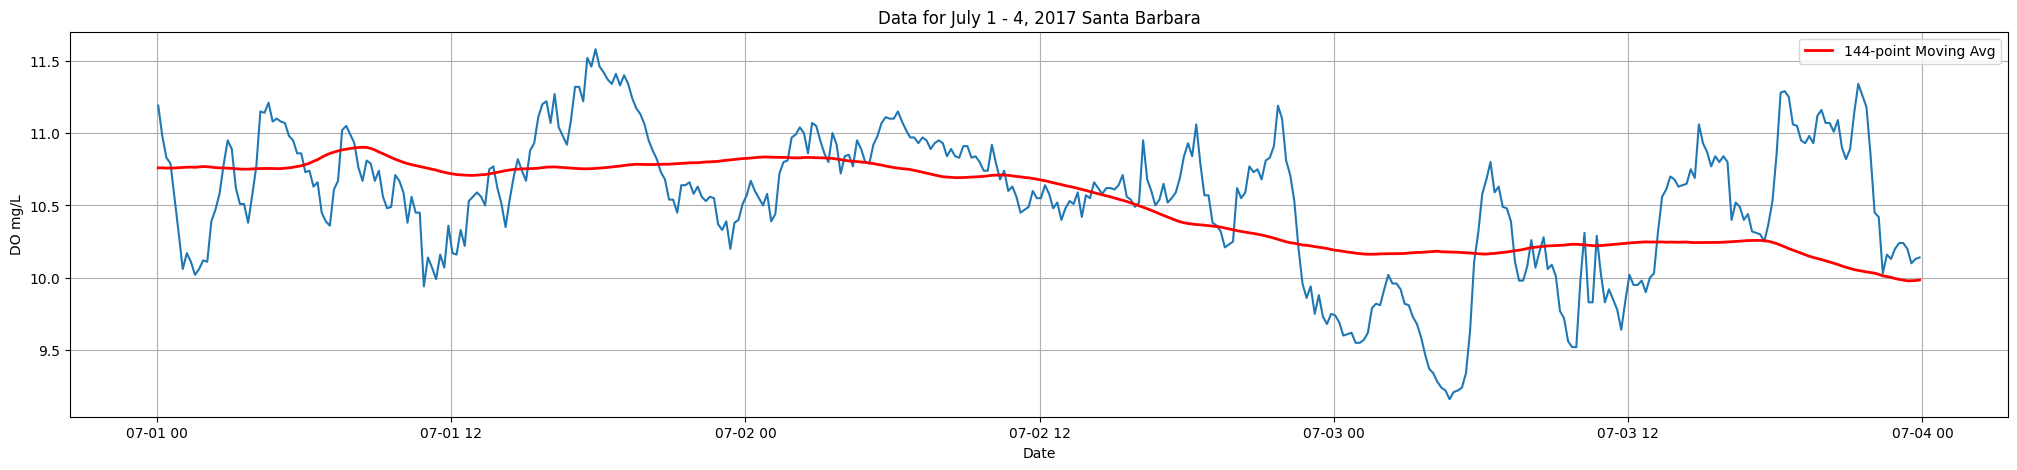

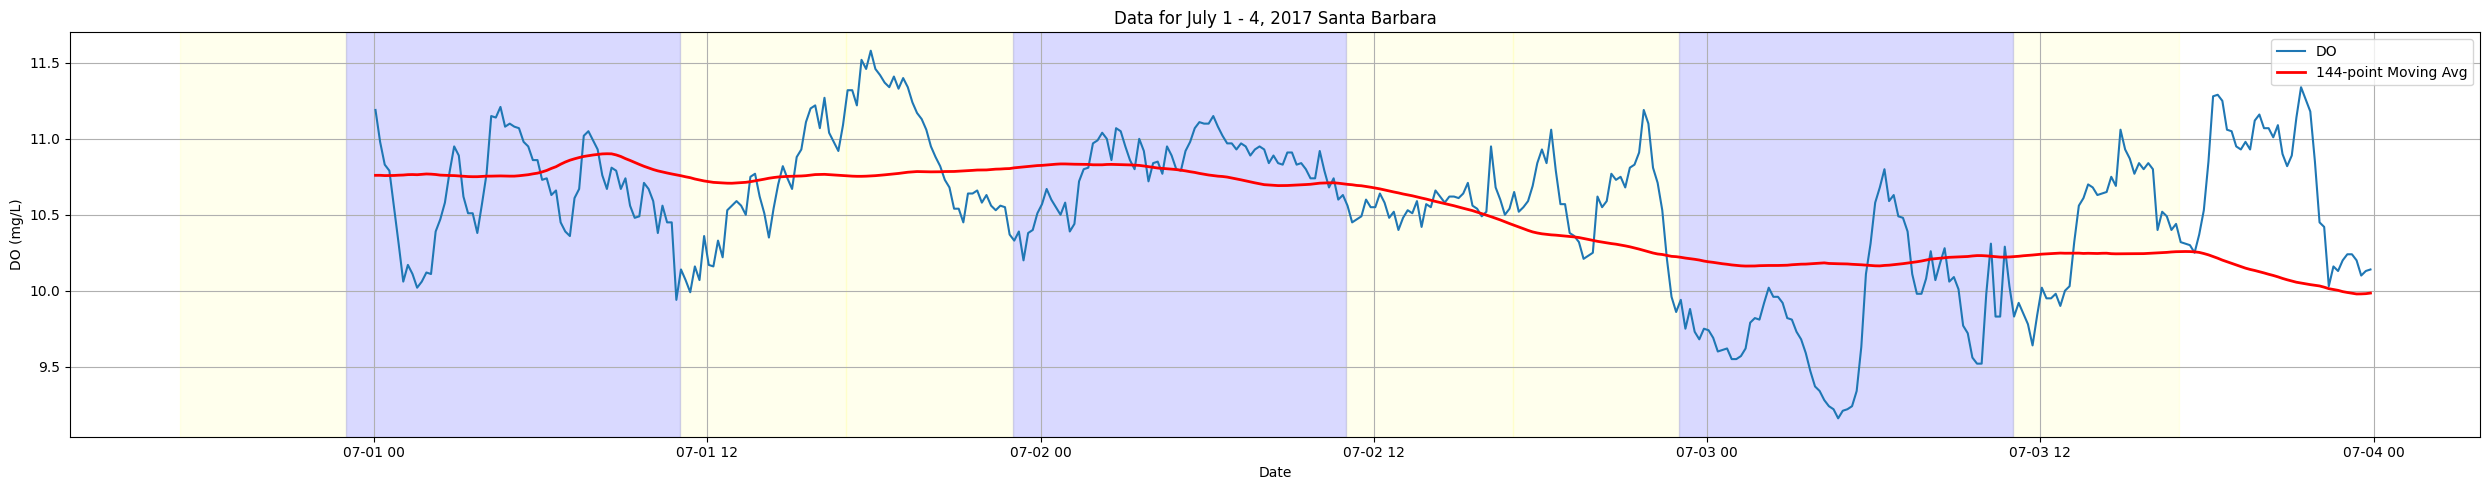

In [49]:
start = '2017-07-01'
end = '2017-07-04'
mask = (df['site'] == 'SBH') & (df['datetime'] >= start) & (df['datetime'] <= end)
july_2017 = df.loc[mask]
plt.figure(figsize=(25, 5))
plt.plot(july_2017['datetime'], july_2017['DO_mgl'])
# Plot the moving average
plt.plot(july_2017['datetime'], july_2017['moving_avg'], color='red', linewidth=2, label=f'{window_size}-point Moving Avg')
plt.title('Data for July 1 - 4, 2017 Santa Barbara')
plt.xlabel('Date')
plt.ylabel('DO mg/L')
plt.legend()
plt.grid(True)
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

start = '2017-07-01'
end = '2017-07-04'
mask = (df['site'] == 'SBH') & (df['datetime'] >= start) & (df['datetime'] <= end)
july_2017 = df.loc[mask]

plt.figure(figsize=(25, 5))
plt.plot(july_2017['datetime'], july_2017['DO_mgl'], label='DO')
plt.plot(july_2017['datetime'], july_2017['moving_avg'], color='red', linewidth=2,
         label=f'{window_size}-point Moving Avg')

# --- Add day/night shading ---
# Determine unique days in your data
unique_days = pd.to_datetime(july_2017['datetime'].dt.date.unique())

for day in unique_days:
    day_start = pd.Timestamp(day)
    day_end = day_start + timedelta(days=1)
    sunrise = day_start + timedelta(hours=6)   # 6 AM
    sunset = day_start + timedelta(hours=18)   # 6 PM

    # Shade day (light yellow)
    plt.axvspan(sunrise, sunset, color='blue', alpha=0.15)
    # Shade night (light blue)
    plt.axvspan(day_start, sunrise, color='yellow', alpha=0.07)
    plt.axvspan(sunset, day_end, color='yellow', alpha=0.07)

# --- Labels ---
plt.title('Data for July 1 - 4, 2017 Santa Barbara')
plt.xlabel('Date')
plt.ylabel('DO (mg/L)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
